<a href="https://colab.research.google.com/github/ElianaMontoya21/project-predictions/blob/main/Metro_Interstate_Traffic_Volume_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [ ]:
# Import the data
path = '/content/Metro_Interstate_Traffic_Volume.csv'
df = pd.read_csv(path)
df


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [ ]:
#Eliminar la columna 'weather_main' ya que es lo mimo que 'weather_description', sólo que esta ultimaesmás especifica que la primera, por eso veo innecesaria tener las dos
df= df.drop(columns=['weather_main'])

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_description  48204 non-null  object        
 6   date_time            48204 non-null  datetime64[ns]
 7   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 2.9+ MB


In [ ]:
# agregar las columnas month, day of month y day of week apartirdela columna  columna date_time y covertir esta ultima en tipo de columna  datetime
df['month (numeric)'] = df['date_time'].dt.month
df['day of month'] = df['date_time'].dt.day
df['day of week (numeric)'] = df['date_time'].dt.weekday

df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_description,date_time,traffic_volume,month (numeric),day of month,day of week (numeric)
0,None,288.28,0.0,0.0,40,scattered clouds,2012-10-02 09:00:00,5545,10,2,1
1,None,289.36,0.0,0.0,75,broken clouds,2012-10-02 10:00:00,4516,10,2,1
2,None,289.58,0.0,0.0,90,overcast clouds,2012-10-02 11:00:00,4767,10,2,1
3,None,290.13,0.0,0.0,90,overcast clouds,2012-10-02 12:00:00,5026,10,2,1
4,None,291.14,0.0,0.0,75,broken clouds,2012-10-02 13:00:00,4918,10,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   holiday                48204 non-null  object        
 1   temp                   48204 non-null  float64       
 2   rain_1h                48204 non-null  float64       
 3   snow_1h                48204 non-null  float64       
 4   clouds_all             48204 non-null  int64         
 5   weather_description    48204 non-null  object        
 6   date_time              48204 non-null  datetime64[ns]
 7   traffic_volume         48204 non-null  int64         
 8   month (numeric)        48204 non-null  int64         
 9   day of month           48204 non-null  int64         
 10  day of week (numeric)  48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 4.0+ MB


#**LIMPIEZA DE DATOS**

In [ ]:
#REVISANDO SI HAY FILAS DUPLICADAS
df.duplicated().sum()


17

In [ ]:
# Eliminar los datos duplicados
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
#Verificandosi hay algún valor faltante 
df.isna().sum()

holiday                  0
temp                     0
rain_1h                  0
snow_1h                  0
clouds_all               0
weather_description      0
date_time                0
traffic_volume           0
month (numeric)          0
day of month             0
day of week (numeric)    0
dtype: int64

In [ ]:
#identificar y tratar cualquier incoherencia en los valores categoricos
df['holiday'].value_counts()

None                         48126
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

In [ ]:
df['weather_description'].value_counts()

sky is clear                           11659
mist                                    5949
overcast clouds                         5079
broken clouds                           4663
scattered clouds                        3460
light rain                              3372
few clouds                              1956
light snow                              1945
Sky is Clear                            1725
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1099
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             124
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

In [ ]:
df['date_time'].value_counts()

2013-04-18 22:00:00    6
2013-05-19 10:00:00    6
2012-12-16 21:00:00    5
2013-12-03 14:00:00    5
2015-07-06 13:00:00    5
                      ..
2015-07-03 21:00:00    1
2015-07-03 22:00:00    1
2015-07-03 23:00:00    1
2015-07-04 00:00:00    1
2018-09-30 23:00:00    1
Name: date_time, Length: 40575, dtype: int64

In [ ]:
#identificando valores Inusuales
df['clouds_all'].value_counts()

90     16437
1      12754
75      5068
40      3992
0       1987
20      1849
64      1558
5       1094
92       776
12       273
8        270
24       186
32       185
88       183
80       181
48       180
68       179
36       169
56       164
76       153
44       147
100       94
99        44
93        34
98        21
87        18
85        17
59        16
96        14
57        13
89        13
91        12
81        11
46         9
97         8
77         7
6          6
63         5
11         5
83         5
16         5
25         4
70         4
58         4
72         3
13         3
3          3
4          3
2          2
50         2
62         2
67         2
42         2
86         2
38         2
60         2
54         2
84         1
17         1
78         1
Name: clouds_all, dtype: int64

In [ ]:
df['temp'].value_counts()

274.150    128
275.150     89
274.080     85
276.793     78
291.150     73
          ... 
260.300      1
259.480      1
251.610      1
262.800      1
304.900      1
Name: temp, Length: 5843, dtype: int64

In [ ]:
df['traffic_volume'].value_counts()

353     50
356     50
340     47
351     44
373     42
        ..
6953     1
2057     1
2585     1
7118     1
2346     1
Name: traffic_volume, Length: 6704, dtype: int64

In [ ]:
df['day of month'].value_counts()

19    1714
6     1699
11    1661
20    1655
26    1643
25    1640
14    1632
18    1630
16    1627
24    1616
4     1613
15    1610
17    1603
28    1596
23    1595
10    1594
12    1580
3     1576
9     1573
7     1568
8     1560
5     1538
2     1524
27    1521
22    1516
21    1509
13    1496
1     1442
30    1390
29    1356
31     910
Name: day of month, dtype: int64

In [ ]:
df['day of month'].value_counts()

19    1714
6     1699
11    1661
20    1655
26    1643
25    1640
14    1632
18    1630
16    1627
24    1616
4     1613
15    1610
17    1603
28    1596
23    1595
10    1594
12    1580
3     1576
9     1573
7     1568
8     1560
5     1538
2     1524
27    1521
22    1516
21    1509
13    1496
1     1442
30    1390
29    1356
31     910
Name: day of month, dtype: int64

In [ ]:
# no se ven valores inusuales 

#**VISUALIZACIÓN DE LOS DATOS**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
traffic_months = df.date_time.dt.month.value_counts()
traffic_months

7     4795
5     4436
8     4378
4     4259
12    4246
1     4006
9     3826
3     3793
6     3766
11    3684
2     3526
10    3472
Name: date_time, dtype: int64

Text(0.5, 1.0, ' Trafico de personas por horas por mes  ')

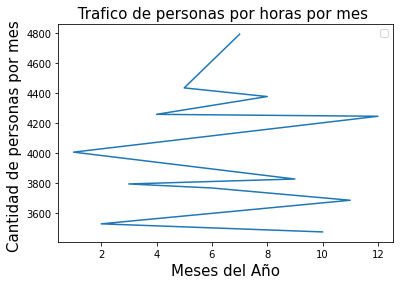

In [ ]:
plt.plot (traffic_months)
plt.legend()
plt.xlabel('Meses del Año', fontsize = 15)
plt.ylabel('Cantidad de personas por mes ', fontsize = 15)
plt.title(' Trafico de personas por horas por mes  ', fontsize = 15)

Según podemos ver en el grafico anterior, en el mes de julio es donde hay más trafico de personas en esa linea del metro 

In [ ]:
traffic_week = df.date_time.dt.weekday.value_counts()
traffic_week

0    7071
2    6926
6    6870
1    6844
4    6830
5    6830
3    6816
Name: date_time, dtype: int64

Text(0.5, 1.0, ' Trafico de personas por horas por día  ')

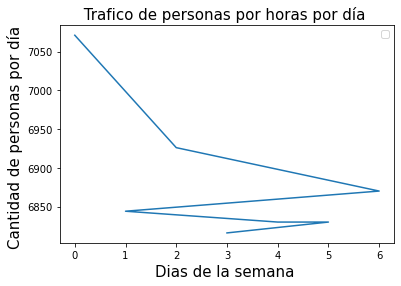

In [ ]:
plt.plot (traffic_week)
plt.legend()
plt.xlabel('Dias de la semana ', fontsize = 15)
plt.ylabel('Cantidad de personas por día ', fontsize = 15)
plt.title(' Trafico de personas por horas por día  ', fontsize = 15)

In [ ]:
#filtrado por fin de semana de viernes a domingo

filter_weekend= df['day of week (numeric)'] >= 5
filter_weekend


0        False
1        False
2        False
3        False
4        False
         ...  
48199     True
48200     True
48201     True
48202     True
48203     True
Name: day of week (numeric), Length: 48187, dtype: bool

In [ ]:
df.loc[filter_weekend, :].head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_description,date_time,traffic_volume,month (numeric),day of month,day of week (numeric)
81,None,278.81,0.0,0.0,90,overcast clouds,2012-10-06 00:00:00,1231,10,6,5
82,None,278.55,0.0,0.0,90,overcast clouds,2012-10-06 01:00:00,718,10,6,5
83,None,278.59,0.0,0.0,90,overcast clouds,2012-10-06 02:00:00,545,10,6,5
84,None,276.99,0.0,0.0,75,broken clouds,2012-10-06 04:00:00,411,10,6,5
85,None,276.35,0.0,0.0,20,few clouds,2012-10-06 05:00:00,688,10,6,5


In [ ]:
#Promedio de pasajeros en días festivos
prom_pasag = df.groupby('holiday' )['traffic_volume'].mean().round(2)
prom_pasag

holiday
Christmas Day                 827.50
Columbus Day                  519.40
Independence Day             1076.00
Labor Day                    1013.14
Martin Luther King Jr Day     612.67
Memorial Day                 1107.60
New Years Day                1356.00
None                         3262.65
State Fair                    634.80
Thanksgiving Day              933.50
Veterans Day                  691.40
Washingtons Birthday          635.20
Name: traffic_volume, dtype: float64

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Promedio Trafico de personas por horas en dias festivos y no festivos  ')

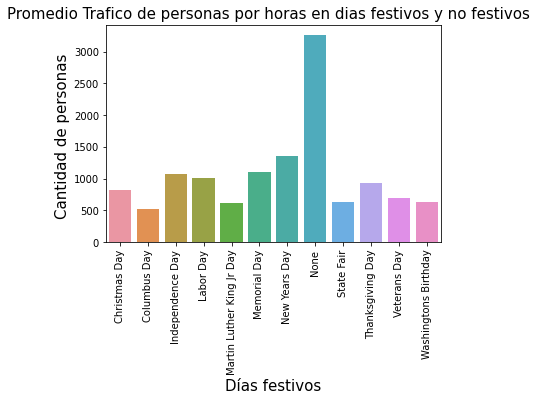

In [ ]:
sns.barplot(x = prom_pasag.index, y = prom_pasag.values);
plt.xticks(rotation = 90);
plt.xlabel('Días festivos', fontsize = 15)
plt.ylabel('Cantidad de personas ', fontsize = 15)
plt.title('Promedio Trafico de personas por horas en dias festivos y no festivos  ', fontsize = 15)

el grafico anterior muestra que aparte de losdías que no son festivos, hay algunos festivos que en promedio se movilizan más pasajeros por hora que en otros festivos, como año nuevo 

In [ ]:
#filtrar por horascon trafico alto de personas 
traffic_filter = df['traffic_volume'] >= 7000
traffic_filter

0        False
1        False
2        False
3        False
4        False
         ...  
48199    False
48200    False
48201    False
48202    False
48203    False
Name: traffic_volume, Length: 48187, dtype: bool

In [ ]:
df.loc[traffic_filter, :]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_description,date_time,traffic_volume,month (numeric),day of month,day of week (numeric)
332,None,274.81,0.0,0.0,20,few clouds,2012-10-16 07:00:00,7055,10,16,1
974,None,277.41,0.0,0.0,90,light intensity drizzle,2012-11-07 07:00:00,7088,11,7,2
975,None,277.41,0.0,0.0,90,mist,2012-11-07 07:00:00,7088,11,7,2
1189,None,278.02,0.0,0.0,75,broken clouds,2012-11-14 16:00:00,7189,11,14,2
1551,None,269.56,0.0,0.0,90,overcast clouds,2012-11-29 07:00:00,7020,11,29,3
...,...,...,...,...,...,...,...,...,...,...,...
43977,None,287.93,0.0,0.0,75,broken clouds,2018-05-10 16:00:00,7074,5,10,3
44532,None,295.35,0.0,0.0,90,haze,2018-05-30 16:00:00,7042,5,30,2
44533,None,295.35,0.0,0.0,90,moderate rain,2018-05-30 16:00:00,7042,5,30,2
44683,None,301.57,0.0,0.0,5,sky is clear,2018-06-04 16:00:00,7024,6,4,0


**Mapa de calor de Correlación**

In [ ]:
matriz_corr= df.corr()
matriz_corr

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month (numeric),day of month,day of week (numeric)
temp,1.000000,0.009070,-0.019756,-0.101968,0.130161,0.223943,0.022677,-0.007824
rain_1h,0.009070,1.000000,-0.000090,0.004818,0.004715,0.001300,-0.002293,-0.006920
snow_1h,-0.019756,-0.000090,1.000000,0.027934,0.000736,0.020422,0.015798,-0.014929
clouds_all,-0.101968,0.004818,0.027934,1.000000,0.067138,-0.009118,0.048425,-0.039816
traffic_volume,0.130161,0.004715,0.000736,0.067138,1.000000,-0.002480,-0.007760,-0.149551
month (numeric),0.223943,0.001300,0.020422,-0.009118,-0.002480,1.000000,0.008686,0.010762
day of month,0.022677,-0.002293,0.015798,0.048425,-0.007760,0.008686,1.000000,0.008627
day of week (numeric),-0.007824,-0.006920,-0.014929,-0.039816,-0.149551,0.010762,0.008627,1.000000


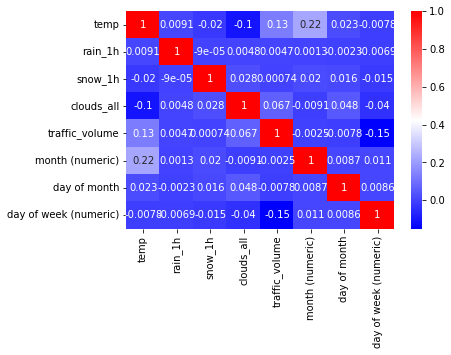

In [ ]:
#Matriz de Correlación
sns.heatmap(matriz_corr, cmap = "bwr", annot = True)


De acuerdo al mapade calor anterior hay una leve correlación positiva de 0.13 entre traffic_volume y temp

**Aprendizaje Automatico**

In [ ]:
# Division validación
X = df.drop('traffic_volume', axis=1)
y = df['traffic_volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#Selectores de Columnas 
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
#instanciarlos transformadores

freq_imput=SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')
# Scalar los datos numericos 
scaler = StandardScaler()

# One Hot Encoder

ohe= OneHotEncoder(handle_unknown='ignore', sparse=False)


In [ ]:
#pipeline numerico
num_pipe = make_pipeline(median_imputer, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
#Pipeline categorico
categ_pipe = make_pipeline(freq_imput, ohe)
categ_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
# tuplas para column transformer 
num_tuple = (num_pipe, num_selector)
cat_tuple= (categ_pipe, cat_selector)

In [ ]:
#columntransformer

preprocessor = make_column_transformer(num_tuple,cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0090fecc40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0090fec8e0>)])

In [ ]:
# Ajustar el preporcessor
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0090fecc40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0090fec8e0>)])

In [ ]:
x_train_proces= preprocessor.transform(X_train)
x_test_proces= preprocessor.transform(X_test)

**Modelo de Regresión Lineal**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# instanciar el modelo de regresión 

reg_lin = LinearRegression()

In [ ]:
#Entrenando el modelo
reg_lin.fit(x_train_proces, y_train)

LinearRegression()

In [ ]:
# obteniendo las predicciones delconjunto de entrenamiento
train_preds = reg_lin.predict(x_train_proces)
print('datos de entrenamiento', train_preds)

# obteniendo las predicciones delconjunto de prueba
test_preds = reg_lin.predict(x_train_proces)
print('datos de prueba',test_preds)

datos de entrenamiento [2307.50183236 3643.26956221 3345.26993225 ... 2936.73153551 3067.52299584
 3112.30032177]
datos de prueba [2307.50183236 3643.26956221 3345.26993225 ... 2936.73153551 3067.52299584
 3112.30032177]


In [ ]:
#medición del rendimiento del modelo 
train_score = reg_lin.score(x_train_proces, y_train)
print(train_score)

0.07321627623364257


In [ ]:
test_score = reg_lin.score(x_test_proces, y_test)
print(test_score)

-4.447489304880591


**Árboles de decisión (Decision Trees)**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#instanciar el modelo 
dec_tree = DecisionTreeRegressor(max_depth = 3, random_state=42)

In [ ]:
#ajustar el modelo con los datos de entrenamiento

dec_tree.fit(x_train_proces, y_train)


DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
#predicciones en los datos de entrenamiento y prueba
train_pred_treedec= dec_tree.predict(x_train_proces)
test_pred_treedec = dec_tree.predict(x_test_proces)
print(train_pred_treedec)
print(test_pred_treedec)

[2027.72476126 3629.86000588 2977.0054637  ... 2977.0054637  2622.60448125
 3060.16118421]
[3629.86000588 2027.72476126 3629.86000588 ... 2977.0054637  2622.60448125
 2977.0054637 ]


In [ ]:
#evaluación del modelo

train_score_treedec = dec_tree.score(x_train_proces, y_train)
test_score_treedec = dec_tree.score(x_test_proces, y_test)
print(train_score_treedec)
print(test_score_treedec)

0.09927274695205246
0.09132223818444352


con el hiperparametro mas_depth = 3, mejoró mi modelo, aunque sigueteniendo un rendimiento bajo

**Modelo Bagged Trees**

In [161]:
from sklearn.ensemble import BaggingRegressor

In [162]:
#instanciar el modelo
bagreg = BaggingRegressor(random_state=42)

In [163]:
#Entrenar el modelo
bagreg.fit(x_train_proces, y_train)

BaggingRegressor(random_state=42)

In [164]:
bagreg.predict(x_test_proces)

array([4377.9, 3521.6, 3991.3, ..., 2497.2, 4014.6, 1661.4])

In [165]:
bagreg.predict(x_train_proces)

array([ 616.63333333, 1805.3       , 6032.1       , ...,  545.7       ,
       1587.5       , 3928.        ])

In [166]:
#Evaluar el modelo
bagreg_train_score = bagreg.score(x_train_proces, y_train)
bagreg_test_score = bagreg.score(x_test_proces, y_test)

print(bagreg_train_score)
print(bagreg_test_score)

0.873731586020126
0.31670881197424317


**Modelo Bosques Aleatorios**

In [167]:
from sklearn.ensemble import RandomForestRegressor

In [168]:
#instanciar el modelo
rf = RandomForestRegressor(random_state=42)

In [169]:
rf.fit(x_train_proces, y_train)

RandomForestRegressor(random_state=42)

In [180]:
rf_preds= rf.predict(x_test_proces)
rf_train_preds =  rf.predict(x_train_proces)

In [174]:
#Evaluación del modelo
rf_train_score = rf.score(x_train_proces, y_train)
rf_test_score = rf.score(x_test_proces, y_test)

print(rf_train_score)
print(rf_test_score)

0.9059128112063206
0.3741610736544919


con el modelo de bosques aleatorios, mejoró el score del train y el test

**Este ha sido el mejor modelo de prediction para este conjunto de datos**